In [1]:
import cv2
import numpy as np
from glob import glob
from natsort import natsorted
from MonlamOCR.Utils import resize_to_height,resize_to_width
from MonlamOCR.Inference import LineDetection, LayoutDetection
from MonlamOCR.Exporter import JsonExporter, PageXMLExporter
from MonlamOCR.Config import init_monlam_line_model, init_monlam_layout_model, LAYOUT_COLORS
from MonlamOCR.Utils import get_file_name, read_line_model_config, read_layout_model_config, show_image, show_overlay, get_contours
from MonlamOCR.Utils import get_random_color

e:\Github\OCR-Deployment\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
kenlm python bindings are not installed. Most likely you want to install it using: pip install https://github.com/kpu/kenlm/archive/master.zip
kenlm python bindings are not installed. Most likely you want to install it using: pip install https://github.com/kpu/kenlm/archive/master.zip


In [2]:
data_path = "SampleData"
images = natsorted(glob(f"{data_path}/*.jpg"))
print(f"Images: {len(images)}")

Images: 4


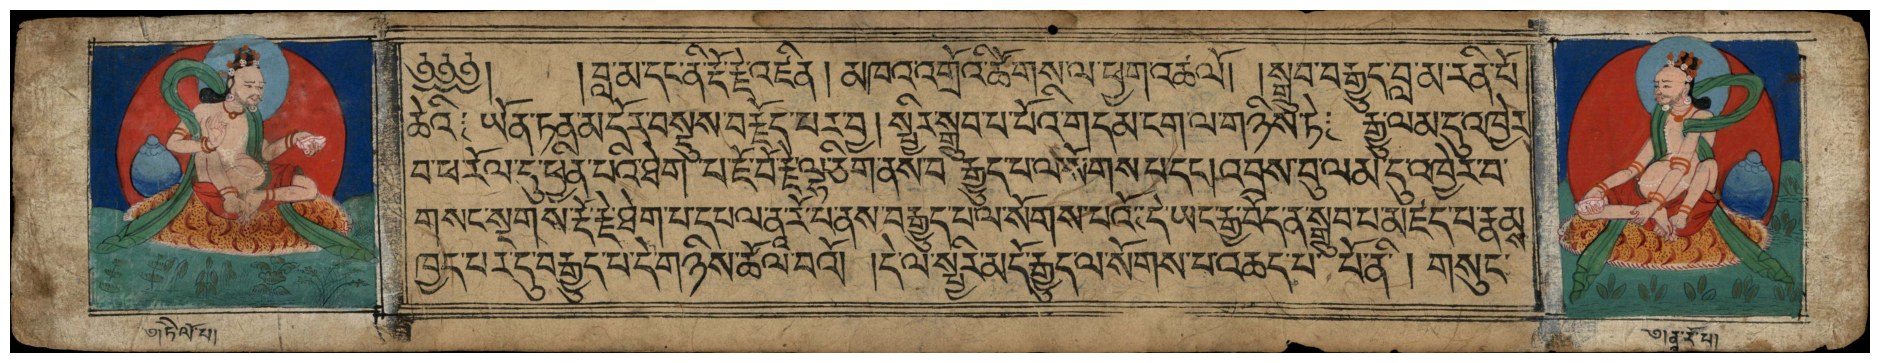

In [5]:
idx = 2
image = cv2.imread(images[idx])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_image(image)

#### Test Inference Classes

In [6]:
from MonlamOCR.Utils import normalize
from scipy.special import softmax

In [7]:
### download line and layout detection models
line_model_config_file = init_monlam_line_model()
layout_model_config_file = init_monlam_layout_model()

line_model_config = read_line_model_config(line_model_config_file)
line_inference = LineDetection(line_model_config)

#layout_model_config = read_layout_model_config(layout_model_config_file)
layout_model_config = read_layout_model_config("MonlamOCR/Models/Layout/2024-6-6_8-58/config.json")
layout_inference = LayoutDetection(layout_model_config)

Fetching 4 files: 100%|██████████| 4/4 [00:00<00:00, 1298.85it/s]
e:\Github\OCR-Deployment\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Layout Classes: ['background', 'image', 'line', 'margin', 'caption']


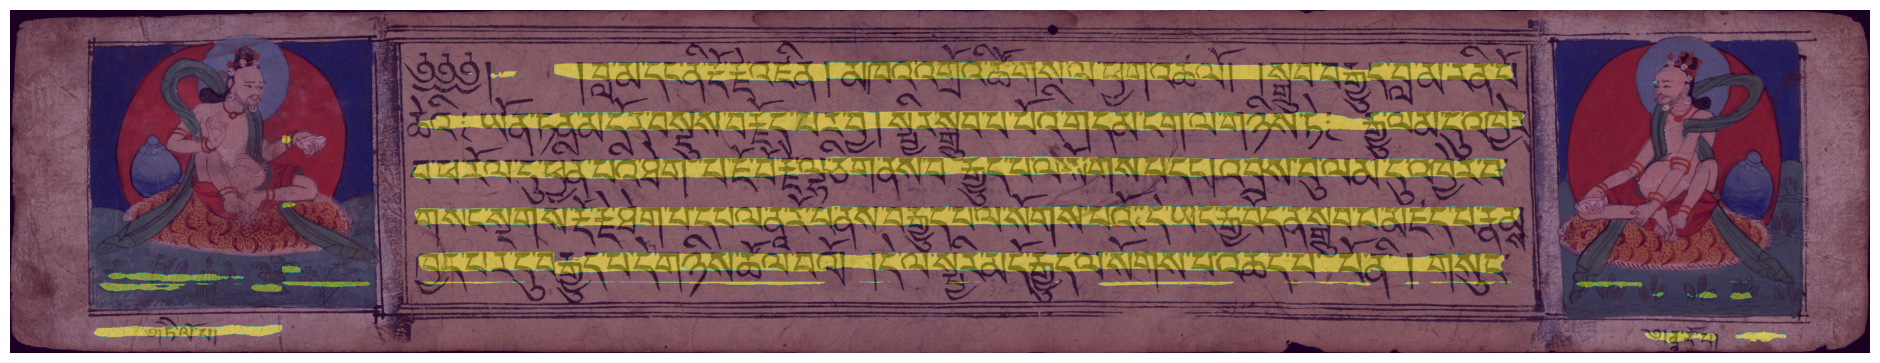

In [8]:
# line_model
line_prediction = line_inference.predict(image)
show_overlay(image, line_prediction)

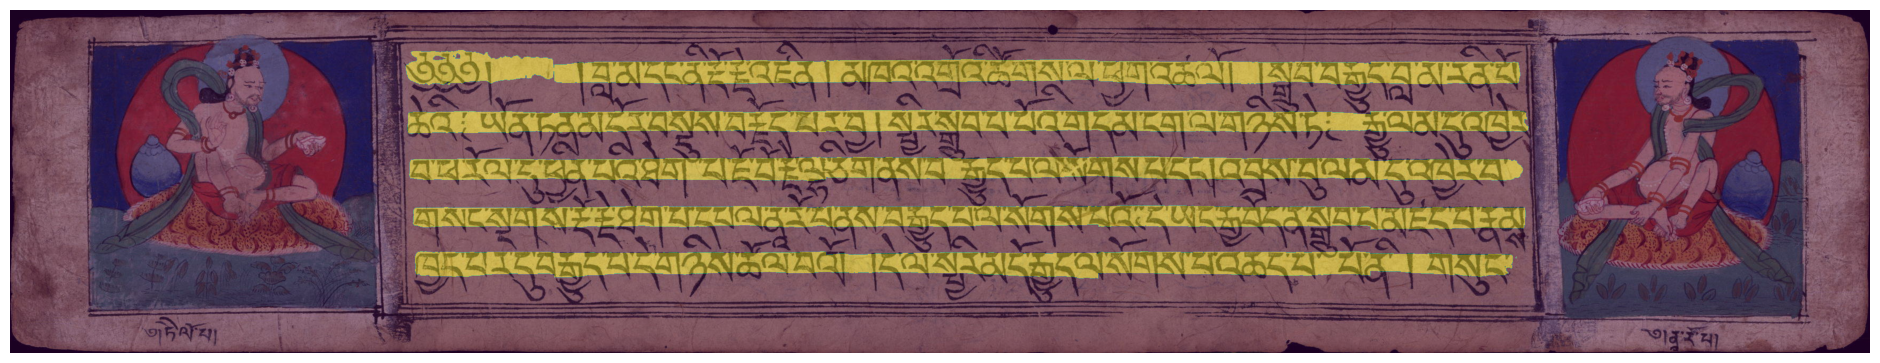

In [14]:
# Layout model
layout_mask = layout_inference.predict(image)

"""
Note: Use the following channels for the respective class as defined in the model config file:
0 = Background
1 = Images
2 = Lines
3 = Margins
4 = Captions
"""
image = cv2.imread(images[idx])
#image = binarize(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show_overlay(image, layout_mask[:, :, 2])

#### Create some Previews

In [10]:
pred_images = get_contours(layout_mask[:, :, 1])
pred_lines = get_contours(layout_mask[:, :, 2])
pred_margin = get_contours(layout_mask[:, :, 3])
pred_caption = get_contours(layout_mask[:, :, 4])

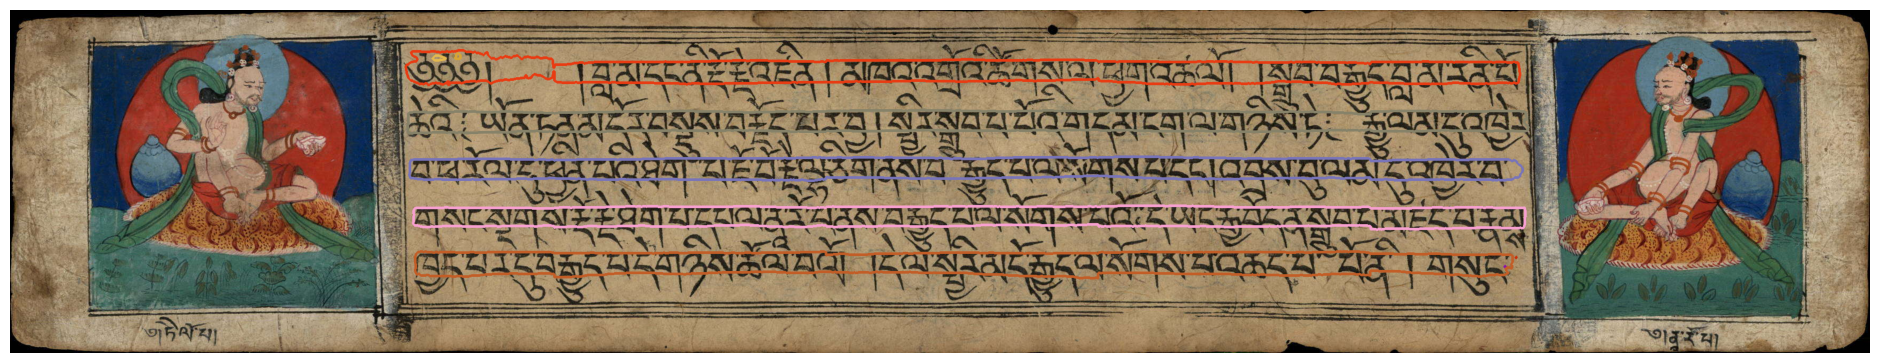

In [11]:
prev_image = image.copy()

if len(pred_lines) > 0:
    for l_idx, _ in enumerate(pred_lines):

        color = get_random_color()
        cv2.drawContours(
            prev_image, pred_lines, contourIdx=l_idx, color=color, thickness=4
            )

show_image(prev_image)

In [12]:
# extract line images
from MonlamOCR.Utils import extract_line_images, get_line_data


line_data = get_line_data(image, layout_mask[:, :, 2])  # for the dim, see classes in the layout config file
line_images = extract_line_images(line_data, k_factor=1.2)

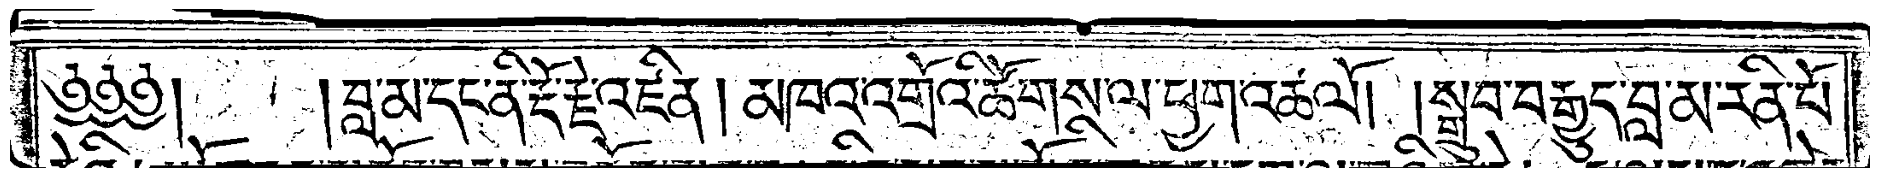

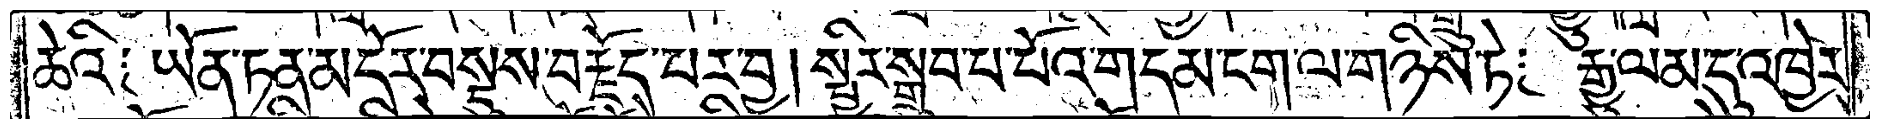

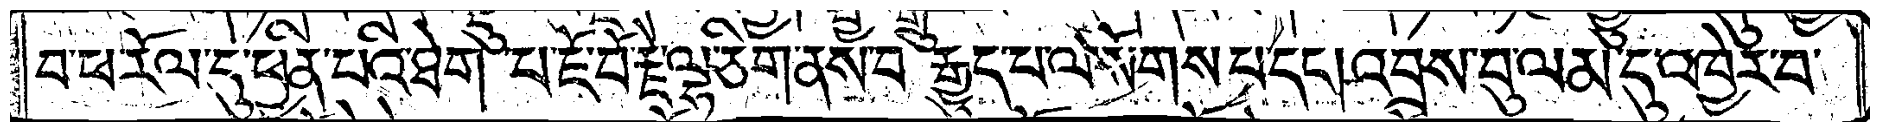

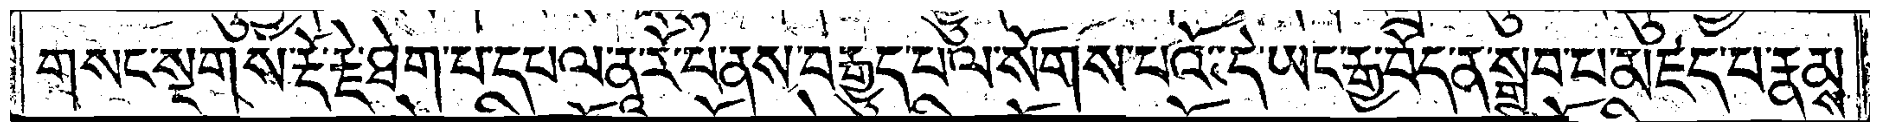

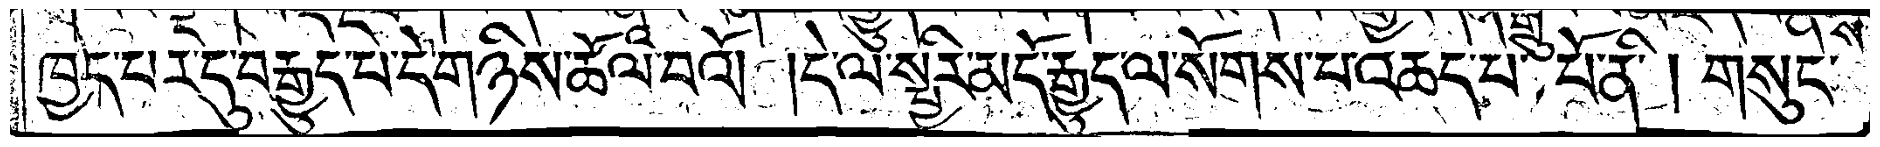

In [13]:
for l_img in line_images:
    show_image(l_img)